In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Loading boston housing dataset from sikit-learn library

In [80]:
#Loading the CSV file
df = pd.read_csv('./Boston.csv')

In [81]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,No,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,No,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,No,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,No,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,No,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Printing description of the dataset

In [82]:
X = df.values[:, :-1]
df_x = pd.DataFrame(X)
df_x.columns = df.columns[:-1]
df_x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18,2.31,No,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98
1,0.02731,0,7.07,No,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14
2,0.02729,0,7.07,No,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,No,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,No,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33


In [84]:
y = df.values[:, -1]
df_y = pd.DataFrame(y)
df_y.columns = df.columns[-1:]
df_y.head()

,medv
0,24
1,21.6
2,34.7
3,33.4
4,36.2


In [34]:
X = boston_dataset.data
y = boston_dataset.target
boston = pd.DataFrame(X, columns =boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Exploratory Data Analysis

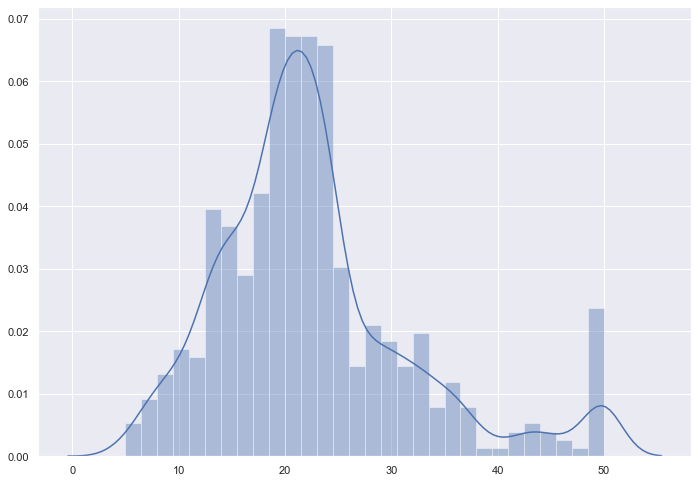

In [85]:
# Ploting distribution of our target variable Y

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(y, bins=30)
plt.show()

- We see that the values of y are distributed normally with few outliers.
- Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the ```corr``` function from the pandas dataframe library. We will use the ```heatmap``` function from the seaborn library to plot the correlation matrix.

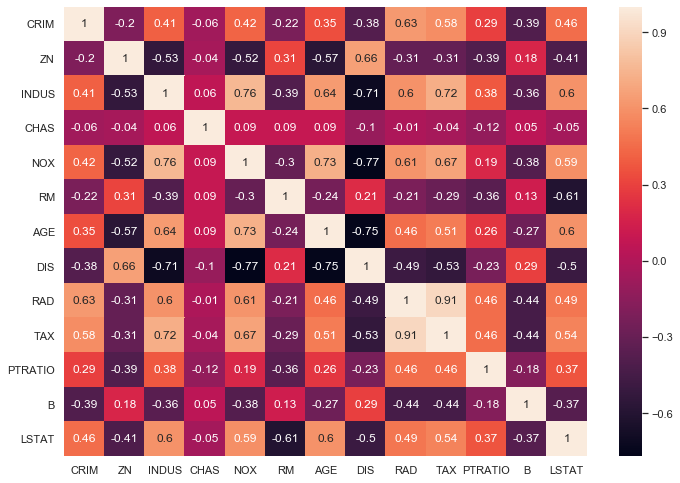

In [86]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

### Observations

- To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with y (0.7) where as LSTAT has a high negative correlation with y(-0.74)
- Now in our regression model if we check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75

Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with y

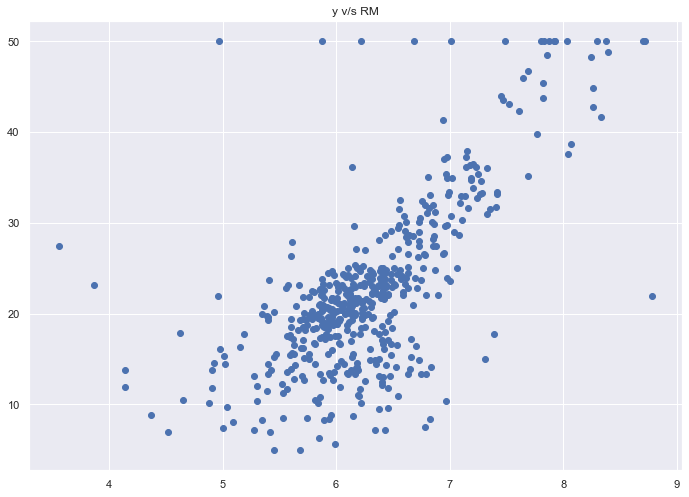

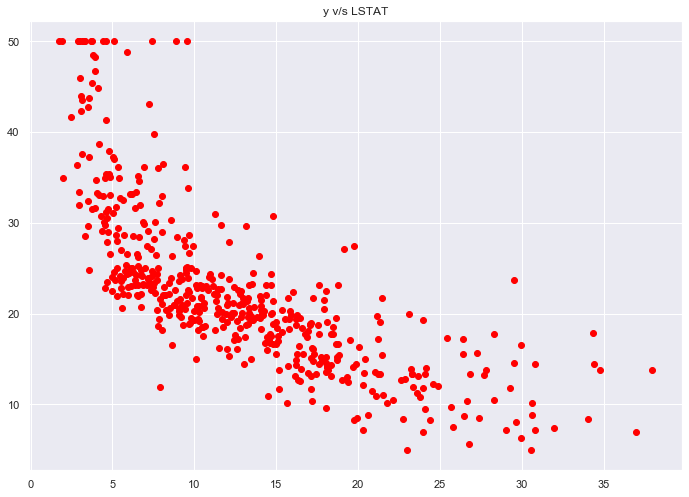

In [87]:
plt.scatter(X[:,5], y)
plt.title("y v/s RM")
plt.show()
plt.scatter(X[:,12], y, color ='red')
plt.title("y v/s LSTAT")
plt.show()

### Observations

- The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
- The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

### Preparing the data for training the model

In [91]:
# Updating X and y
X = pd.DataFrame(np.c_[df['lstat'], df['rm']], columns = ['LSTAT','RM'])

Splitting the data into training and testing sets

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


### Training and testing the model

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Finally model evaluation

In [94]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set: ")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set: ")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set: 
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set: 
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


### R-squared, Adjusted R-squared, P values

In [100]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_test)
est = sm.OLS(y_test.astype(float), X2.astype(float))

est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     134.5
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           6.02e-29
Time:                        01:33:58   Log-Likelihood:                -300.17
No. Observations:                 102   AIC:                             606.3
Df Residuals:                      99   BIC:                             614.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.9234      6.649     -3.748      0.0